# Imports and configs

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, f_classif, RFE, VarianceThreshold, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import optuna
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
data = pd.read_csv(r'./modelling_data/modelling_data.csv')

In [4]:
data.head()

,home_team_cumulative_goals_scored_pre_game,away_team_cumulative_goals_scored_pre_game,home_team_cumulative_goals_conceded_pre_game,away_team_cumulative_goals_conceded_pre_game,home_team_average_goals_scored_per_game_pre_game,away_team_average_goals_scored_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,home_team_average_first_half_goals_scored_pre_game,home_team_average_second_half_goals_scored_pre_game,away_team_average_first_half_goals_scored_pre_game,away_team_average_second_half_goals_scored_pre_game,home_team_average_first_half_goals_conceded_pre_game,home_team_average_second_half_goals_conceded_pre_game,away_team_average_first_half_goals_conceded_pre_game,away_team_average_second_half_goals_conceded_pre_game,home_team_average_first_half_goals_total_pre_game,home_team_average_second_half_goals_total_pre_game,away_team_average_first_half_goals_total_pre_game,away_team_average_second_half_goals_total_pre_game,home_team_average_corners_total_per_game_pre_game,away_team_average_corners_total_per_game_pre_game,home_team_average_corners_per_game_pre_game,away_team_average_corners_per_game_pre_game,home_team_average_yellow_cards_total_per_game_pre_game,away_team_average_yellow_cards_total_per_game_pre_game,home_team_average_yellow_cards_per_game_pre_game,away_team_average_yellow_cards_per_game_pre_game,home_team_cumulative_red_cards_pre_game,away_team_cumulative_red_cards_pre_game,home_team_average_red_cards_total_per_game_pre_game,away_team_average_red_cards_total_per_game_pre_game,home_team_average_red_cards_per_game_pre_game,away_team_average_red_cards_per_game_pre_game,home_team_average_shots_per_game_pre_game,home_team_average_shots_on_target_per_game_pre_game,away_team_average_shots_per_game_pre_game,away_team_average_shots_on_target_per_game_pre_game,home_team_average_fouls_per_game_pre_game,away_team_average_fouls_per_game_pre_game,home_team_average_fouls_total_per_game_pre_game,away_team_average_fouls_total_per_game_pre_game,home_team_average_possession_per_game_pre_game,away_team_average_possession_per_game_pre_game,home_team_average_xg_per_game_pre_game,away_team_average_xg_per_game_pre_game,home_team_games_without_goals_pre_game,away_team_games_without_goals_pre_game,home_team_cumulative_btts_pre_game,away_team_cumulative_btts_pre_game,home_team_cumulative_clean_sheets_pre_game,away_team_cumulative_clean_sheets_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_draws_pre_game,home_team_cumulative_losses_pre_game,away_team_cumulative_wins_pre_game,away_team_cumulative_draws_pre_game,away_team_cumulative_losses_pre_game,home_team_average_points_per_game_pre_game,away_team_average_points_per_game_pre_game,home_team_wins_in_last_5_games,home_team_draws_in_last_5_games,home_team_losses_in_last_5_games,away_team_wins_in_last_5_games,away_team_draws_in_last_5_games,away_team_losses_in_last_5_games,home_team_average_goals_scored_in_last_5_games,away_team_average_goals_scored_in_last_5_games,home_team_average_goals_conceded_in_last_5_games,away_team_average_goals_conceded_in_last_5_games,average_total_corners_in_home_team_games_in_last_5_games,average_total_corners_in_away_team_games_in_last_5_games,average_corners_by_home_team_in_last_5_games,average_corners_by_away_team_in_last_5_games,average_yellow_cards_by_home_team_in_last_5_games,average_yellow_cards_by_away_team_in_last_5_games,average_red_cards_by_home_team_in_last_5_games,average_red_cards_by_away_team_in_last_5_games,average_ball_possession_by_home_team_in_last_5_games,average_ball_possession_by_away_team_in_last_5_games,average_xg_by_home_team_in_last_5_games,average_xg_by_away_team_in_last_5_games,average_shots_by_home_team_in_last_5_games,average_shots_by_away_team_in_last_5_games,average_shots_on_target_by_home_team_in_last_5_games,average_shots_on_target_by_away_team_in_last_5_games,average_total_fouls_in_home_team_games_in_last_5_games,average_total_fouls_in_away_team_games

# Basic data glimpse

In [5]:
data.shape

(34369, 116)

In [6]:
data.head()

,home_team_cumulative_goals_scored_pre_game,away_team_cumulative_goals_scored_pre_game,home_team_cumulative_goals_conceded_pre_game,away_team_cumulative_goals_conceded_pre_game,home_team_average_goals_scored_per_game_pre_game,away_team_average_goals_scored_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,home_team_average_first_half_goals_scored_pre_game,home_team_average_second_half_goals_scored_pre_game,away_team_average_first_half_goals_scored_pre_game,away_team_average_second_half_goals_scored_pre_game,home_team_average_first_half_goals_conceded_pre_game,home_team_average_second_half_goals_conceded_pre_game,away_team_average_first_half_goals_conceded_pre_game,away_team_average_second_half_goals_conceded_pre_game,home_team_average_first_half_goals_total_pre_game,home_team_average_second_half_goals_total_pre_game,away_team_average_first_half_goals_total_pre_game,away_team_average_second_half_goals_total_pre_game,home_team_average_corners_total_per_game_pre_game,away_team_average_corners_total_per_game_pre_game,home_team_average_corners_per_game_pre_game,away_team_average_corners_per_game_pre_game,home_team_average_yellow_cards_total_per_game_pre_game,away_team_average_yellow_cards_total_per_game_pre_game,home_team_average_yellow_cards_per_game_pre_game,away_team_average_yellow_cards_per_game_pre_game,home_team_cumulative_red_cards_pre_game,away_team_cumulative_red_cards_pre_game,home_team_average_red_cards_total_per_game_pre_game,away_team_average_red_cards_total_per_game_pre_game,home_team_average_red_cards_per_game_pre_game,away_team_average_red_cards_per_game_pre_game,home_team_average_shots_per_game_pre_game,home_team_average_shots_on_target_per_game_pre_game,away_team_average_shots_per_game_pre_game,away_team_average_shots_on_target_per_game_pre_game,home_team_average_fouls_per_game_pre_game,away_team_average_fouls_per_game_pre_game,home_team_average_fouls_total_per_game_pre_game,away_team_average_fouls_total_per_game_pre_game,home_team_average_possession_per_game_pre_game,away_team_average_possession_per_game_pre_game,home_team_average_xg_per_game_pre_game,away_team_average_xg_per_game_pre_game,home_team_games_without_goals_pre_game,away_team_games_without_goals_pre_game,home_team_cumulative_btts_pre_game,away_team_cumulative_btts_pre_game,home_team_cumulative_clean_sheets_pre_game,away_team_cumulative_clean_sheets_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_draws_pre_game,home_team_cumulative_losses_pre_game,away_team_cumulative_wins_pre_game,away_team_cumulative_draws_pre_game,away_team_cumulative_losses_pre_game,home_team_average_points_per_game_pre_game,away_team_average_points_per_game_pre_game,home_team_wins_in_last_5_games,home_team_draws_in_last_5_games,home_team_losses_in_last_5_games,away_team_wins_in_last_5_games,away_team_draws_in_last_5_games,away_team_losses_in_last_5_games,home_team_average_goals_scored_in_last_5_games,away_team_average_goals_scored_in_last_5_games,home_team_average_goals_conceded_in_last_5_games,away_team_average_goals_conceded_in_last_5_games,average_total_corners_in_home_team_games_in_last_5_games,average_total_corners_in_away_team_games_in_last_5_games,average_corners_by_home_team_in_last_5_games,average_corners_by_away_team_in_last_5_games,average_yellow_cards_by_home_team_in_last_5_games,average_yellow_cards_by_away_team_in_last_5_games,average_red_cards_by_home_team_in_last_5_games,average_red_cards_by_away_team_in_last_5_games,average_ball_possession_by_home_team_in_last_5_games,average_ball_possession_by_away_team_in_last_5_games,average_xg_by_home_team_in_last_5_games,average_xg_by_away_team_in_last_5_games,average_shots_by_home_team_in_last_5_games,average_shots_by_away_team_in_last_5_games,average_shots_on_target_by_home_team_in_last_5_games,average_shots_on_target_by_away_team_in_last_5_games,average_total_fouls_in_home_team_games_in_last_5_games,average_total_fouls_in_away_team_games

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37339 entries, 0 to 37338
Columns: 170 entries, attendance to average_draw_odds_by_away_team_in_last_5_games
dtypes: float64(113), int64(51), object(6)
memory usage: 48.4+ MB


In [7]:
data.groupby(['league', 'season']).apply(lambda x: x['game_week'].isna().sum())

league              season
austria             18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
belgium pro league  18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
bundesliga          18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
czech first league  18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
denmark             18/19     0
                    19/20     0
                    20/21     0
                    21/22     0
                    22/23     0
                    23/24     0
ekstraklasa  

In [8]:
data.dtypes

attendance                                                  float64
home_team_name                                               object
away_team_name                                               object
game_week                                                   float64
home_team_goal_count                                          int64
away_team_goal_count                                          int64
total_goal_count                                              int64
total_goals_at_half_time                                      int64
home_team_goal_count_half_time                                int64
away_team_goal_count_half_time                                int64
home_team_corner_count                                        int64
away_team_corner_count                                        int64
home_team_yellow_cards                                        int64
home_team_red_cards                                           int64
away_team_yellow_cards                          

# Result prediction

## Data preparation

In [8]:
selected_features = ['odds_ft_home_team_win', 'odds_ft_away_team_win', 'odds_ft_draw',
       'average_xg_by_home_team_in_last_5_games',
       'away_team_cumulative_losses_pre_game',
       'home_team_cumulative_btts_pre_game',
       'away_team_cumulative_draws_pre_game',
       'home_team_cumulative_wins_pre_game',
       'home_team_cumulative_losses_pre_game',
       'home_team_cumulative_draws_pre_game',
       'home_team_average_xg_per_game_pre_game',
       'away_team_average_goals_conceded_per_game_pre_game',
       'average_shots_by_home_team_in_last_5_games',
       'away_team_average_xg_per_game_pre_game',
       'away_team_average_points_per_game_pre_game',
       'average_total_fouls_in_away_team_games_in_last_5_games',
       'average_fouls_by_away_team_in_last_5_games',
       'home_team_average_fouls_per_game_pre_game',
       'away_team_cumulative_goals_conceded_pre_game',
       'home_team_average_fouls_total_per_game_pre_game',
       'home_team_average_shots_per_game_pre_game',
       'away_team_average_corners_per_game_pre_game',
       'average_total_fouls_in_home_team_games_in_last_5_games',
       'odds_btts_yes', 'average_xg_by_away_team_in_last_5_games',
       'away_team_cumulative_goals_scored_pre_game',
       'away_team_average_shots_on_target_per_game_pre_game',
       'home_team_average_goals_conceded_per_game_pre_game',
       'home_team_cumulative_clean_sheets_pre_game',
       'average_fouls_by_home_team_in_last_5_games',
       'season', 'result']

In [9]:
len(selected_features)

32

In [10]:
modelling_data = data[selected_features]

In [11]:
columns_to_scale = modelling_data.columns.difference(['result', 'season'])

In [15]:
modelling_data[columns_to_scale] = RobustScaler().fit_transform(modelling_data[columns_to_scale])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\3584175364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modelling_data[columns_to_scale] = RobustScaler().fit_transform(modelling_data[columns_to_scale])


In [16]:
modelling_data.head()

,odds_ft_home_team_win,odds_ft_away_team_win,odds_ft_draw,average_xg_by_home_team_in_last_5_games,away_team_cumulative_losses_pre_game,home_team_cumulative_btts_pre_game,away_team_cumulative_draws_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_losses_pre_game,home_team_cumulative_draws_pre_game,home_team_average_xg_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,average_shots_by_home_team_in_last_5_games,away_team_average_xg_per_game_pre_game,away_team_average_points_per_game_pre_game,average_total_fouls_in_away_team_games_in_last_5_games,average_fouls_by_away_team_in_last_5_games,home_team_average_fouls_per_game_pre_game,away_team_cumulative_goals_conceded_pre_game,home_team_average_fouls_total_per_game_pre_game,home_team_average_shots_per_game_pre_game,away_team_average_corners_per_game_pre_game,average_total_fouls_in_home_team_games_in_last_5_games,odds_btts_yes,average_xg_by_away_team_in_last_5_games,away_team_cumulative_goals_scored_pre_game,away_team_average_shots_on_target_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,home_team_cumulative_clean_sheets_pre_game,average_fouls_by_home_team_in_last_5_games,season,result
0,-0.56,1.16,0.80,-3.38,-0.75,-0.90,-0.80,-0.75,-0.75,-0.80,-4.09,-2.10,-2.85,-4.07,-1.86,-3.87,-3.16,-3.69,-0.88,-4.27,-3.49,-3.34,-3.84,0.22,-3.42,-0.88,-3.35,-2.06,-0.80,-3.16,18/19,1
1,-0.61,1.39,0.93,-3.38,-0.75,-0.90,-0.80,-0.75,-0.75,-0.80,-4.09,-2.10,-2.85,-4.07,-1.86,-3.87,-3.16,-3.69,-0.88,-4.27,-3.49,-3.34,-3.84,0.67,-3.42,-0.88,-3.35,-2.06,-0.80,-3.16,18/19,1
2,0.13,-0.09,-0.40,-3.38,-0.75,-0.90,-0.80,-0.75,-0.75,-0.80,-4.09,-2.10,-2.85,-4.07,-1.86,-3.87,-3.16,-3.69,-0.88,-4.27,-3.49,-3.34,-3.84,0.37,-3.42,-0.88,-3.35,-2.06,-0.80,-3.16,18/19,2
3,-0.65,1.73,0.93,-3.38,-0.75,-0.90,-0.80,-0.75,-0.75,-0.80,-4.09,-2.10,-2.85,-4.07,-1.86,-3.87,-3.16,-3.69,-0.88,-4.27,-3.49,-3.34,-3.84,1.22,-3.42,-0.88,-3.35,-2.06,-0.80,-3.16,18/19,1
4,3.63,-0.80,1.40,-3.38,-0.75,-0.90,-0.80,-0.75,-0.75,-0.80,-4.09,-2.10,-2.85,-4.07,-1.86,-3.87,-3.16,-3.69,-0.88,-4.27,-3.49,-3.34,-3.84,0.00,-3.42,-0.88,-3.35,-2.06,-0.80,-3.16,18/19,2


In [17]:
train_data = modelling_data[~modelling_data['season'].isin(['23/24', '24/24'])]
test_data = modelling_data[modelling_data['season'].isin(['23/24', '24/24'])]

In [18]:
train_data.season.value_counts()

season
21/22    5442
22/23    5388
20/21    5308
18/19    4692
19/20    4654
23/23     761
22/22     728
21/21     710
19/19     635
20/20     560
Name: count, dtype: int64

In [19]:
test_data.season.value_counts()

season
23/24    5165
24/24     326
Name: count, dtype: int64

In [20]:
X_train = train_data.drop(['season', 'result'], axis=1)
y_train = train_data['result']

In [21]:
X_test = test_data.drop(['season', 'result'], axis=1)
y_test = test_data['result']

## Random forest

### Base

In [56]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

In [57]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [58]:
y_pred = rf_model.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.03      0.07      1951
           1       0.53      0.90      0.67      3268
           2       0.57      0.47      0.52      2249

    accuracy                           0.54      7468
   macro avg       0.66      0.47      0.42      7468
weighted avg       0.63      0.54      0.46      7468



### Hyperparameters tuning with optuna

In [168]:
def objective(trial):
    # Number of trees in random forest
    n_estimators = trial.suggest_int(name="n_estimators", low=100, high=500, step=100)

    # Number of features to consider at every split
    max_features = trial.suggest_categorical(name="max_features", choices=['sqrt', 'log2', None]) 

    # Maximum number of levels in tree
    max_depth = trial.suggest_int(name="max_depth", low=10, high=110, step=20)

    # Minimum number of samples required to split a node
    min_samples_split = trial.suggest_int(name="min_samples_split", low=2, high=10, step=2)

    # Minimum number of samples required at each leaf node
    min_samples_leaf = trial.suggest_int(name="min_samples_leaf", low=1, high=4, step=1)
    
    params = {
        "n_estimators": n_estimators,
        "max_features": max_features,
        "max_depth": max_depth,
        "min_samples_split": min_samples_split,
        "min_samples_leaf": min_samples_leaf
    }
    model = RandomForestClassifier(random_state=42, **params)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # cv_score = cross_val_score(model, X_train, y_train, n_jobs=4, cv=5)
    # mean_cv_accuracy = cv_score.mean()
    return acc

In [169]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

[I 2024-07-13 16:38:31,007] A new study created in memory with name: no-name-8088fcba-2a49-4459-9989-09039185b482
[W 2024-07-13 16:40:11,421] Trial 0 failed with parameters: {'n_estimators': 400, 'max_features': None, 'max_depth': 110, 'min_samples_split': 6, 'min_samples_leaf': 3} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\Łukasz\AppData\Local\Temp\ipykernel_31148\3511437812.py", line 26, in objective
    model.fit(X_train, y_train)
  File "c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\envs\magisterka_env\Lib\site-packages\sklearn\ensemble\_forest.py

KeyboardInterrupt: 

## XGBoost

In [22]:
# Ustawienia dla XGBoost
params = {
    'max_depth': 3,  # głębokość drzew
    'eta': 0.1,      # współczynnik uczenia
    'objective': 'multi:softprob',  # funkcja straty dla klasyfikacji wieloklasowej
    'num_class': 3   # liczba klas wynikowych
}

# Przekształcenie danych do formatu DMatrix, który jest bardziej efektywny dla XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Trenowanie modelu
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predykcja
y_pred_prob = bst.predict(dtest)
y_pred = np.argmax(y_pred_prob, axis=1)  # Wybieramy klasę z najwyższym prawdopodobieństwem

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji XGBoost: {:.2f}%".format(accuracy * 100))

Dokładność klasyfikacji XGBoost: 52.18%


<Figure size 2000x1600 with 0 Axes>

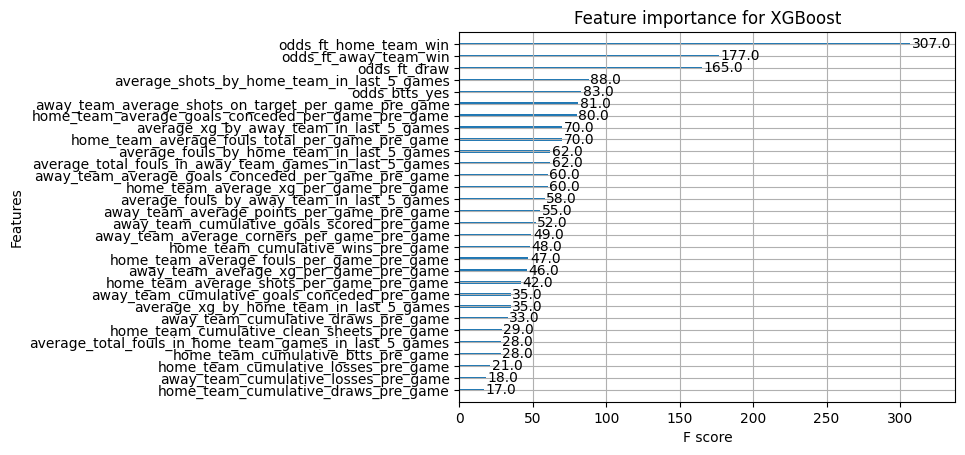

In [23]:
# Ważność cech
plt.figure(figsize=(20,16))
xgb.plot_importance(bst)
plt.title('Feature importance for XGBoost')
plt.show()

### Hyperparameter tuning

In [50]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    #creating datasets in xgb interface
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    params = {
        "objective": "multi:softprob",
        "num_class": "3",
        "n_estimators": 1000,
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 20),
        "gamma": trial.suggest_float("gamma", 0.0, 0.5),
        "lambda": trial.suggest_float("lambda", 1e-5, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-5, 10.0, log=True),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 10.0),
        "num_boost_round": trial.suggest_int("num_boost_round", 100, 1000),
        "early_stopping_rounds": trial.suggest_int("early_stopping_rounds", 10, 100)
    }

    # model = xgb.XGBClassifier(**params)
    # model.fit(X_train, y_train, verbose=False)
    
    bst = xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_prob = bst.predict(dtest)
    predictions = np.argmax(y_pred_prob, axis=1)
    
    # predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [51]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-22 18:18:00,897] A new study created in memory with name: no-name-2022892d-993e-4881-9332-251187b6af62
[I 2024-08-22 18:18:01,792] Trial 0 finished with value: 0.5170278637770898 and parameters: {'learning_rate': 0.0915828210990633, 'max_depth': 4, 'subsample': 0.08306436103923297, 'colsample_bytree': 0.701538221549679, 'min_child_weight': 2, 'gamma': 0.30839293144343705, 'lambda': 9.855948569712774e-05, 'alpha': 0.0008730835496283164, 'scale_pos_weight': 3.73930418837479, 'num_boost_round': 748, 'early_stopping_rounds': 84}. Best is trial 0 with value: 0.5170278637770898.
[I 2024-08-22 18:18:03,030] Trial 1 finished with value: 0.5237661628118739 and parameters: {'learning_rate': 0.0030020486009908406, 'max_depth': 5, 'subsample': 0.8126298729141644, 'colsample_bytree': 0.790467289092422, 'min_child_weight': 5, 'gamma': 0.1753848698459302, 'lambda': 2.082999205944386, 'alpha': 0.001441826367000763, 'scale_pos_weight': 4.972186846522551, 'num_boost_round': 395, 'early_stoppi

In [52]:
xgb_optuna_best_params = study.best_params
xgb_optuna_best_acc = study.best_value

In [29]:
xgb_optuna_best_params

{'learning_rate': 0.00028850801061317195,
 'max_depth': 9,
 'subsample': 0.7595213442638261,
 'colsample_bytree': 0.6090857002764175,
 'min_child_weight': 4,
 'gamma': 0.2937828212187732,
 'lambda': 0.4875430352596594,
 'alpha': 0.0017070982688713486,
 'scale_pos_weight': 3.028789567587536,
 'num_boost_round': 205,
 'early_stopping_rounds': 46}

In [75]:
xgb_optuna_best_params['objective'] = 'multi:softprob'

In [79]:
xgb_optuna_best_params['num_class'] = 3

In [80]:
xgb_optuna_best_params

{'learning_rate': 0.018854188545073352,
 'max_depth': 6,
 'subsample': 0.7473497986534416,
 'colsample_bytree': 0.42759609597862747,
 'min_child_weight': 12,
 'objective': 'multi:softprob',
 'num_class': 3}

## LightGBM

In [61]:
import lightgbm as lgb

# Ustawienia
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 3,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'max_depth': 3,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5
}

# Trenowanie
train_data = lgb.Dataset(X_train_trunc, label=y_train)
test_data = lgb.Dataset(X_test_trunc, label=y_test, reference=train_data)

# Model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)

# Predykcja
y_pred = model.predict(X_test_trunc)
y_pred = np.argmax(y_pred, axis=1)

# Ocena
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji LightGBM: {:.2f}%".format(accuracy * 100))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4529
[LightGBM] [Info] Number of data points in the train set: 30284, number of used features: 26
[LightGBM] [Info] Start training from score -1.382340
[LightGBM] [Info] Start training from score -0.819852
[LightGBM] [Info] Start training from score -1.175992
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

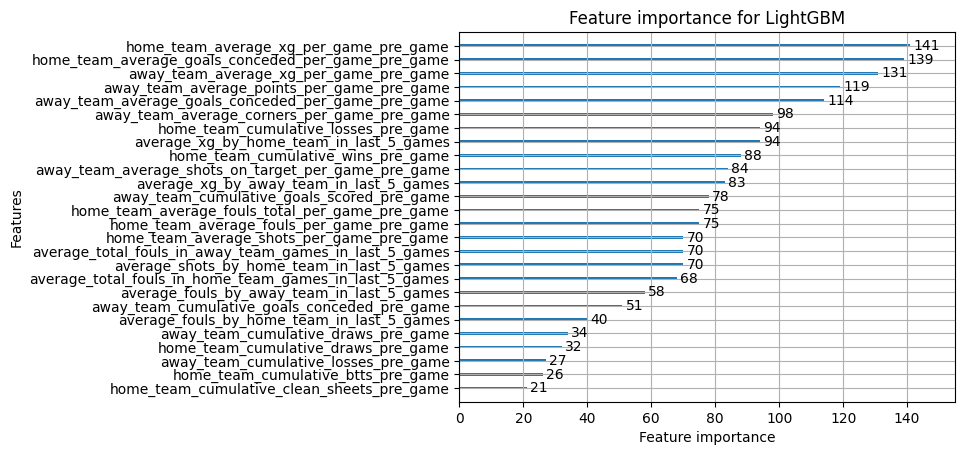

In [62]:
lgb.plot_importance(model, importance_type='split')
plt.title('Feature importance for LightGBM')
plt.show()

### Hyperparameter tuning

In [46]:
def objective(trial):
    param = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'num_class': 3,
        'verbosity': -1,
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 0.1),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.001, 10.0)

    }

    train_data = lgb.Dataset(X_train, label=y_train)
    test_data = lgb.Dataset(X_test, label=y_test)

    model = lgb.train(param, train_data, valid_sets=[test_data])

    y_pred = model.predict(X_test)
    predictions = np.argmax(y_pred, axis=1)
    acc = accuracy_score(y_test, predictions)

    return acc

In [47]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-22 18:13:22,512] A new study created in memory with name: no-name-5c433f54-8ce7-4ac3-8d86-dea75c98f356
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\2134813082.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\2134813082.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_26696\2134813082.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/

In [48]:
lgbm_optuna_best_params = study.best_params
lgbm_optuna_best_acc = study.best_value

In [49]:
lgbm_optuna_best_acc

0.5254052085230377

## Catboost

In [63]:
# Inicjalizacja modelu
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='MultiClass',  # dla klasyfikacji wieloklasowej
    verbose=True
)

# Trenowanie modelu
model.fit(X_train_trunc, y_train, eval_set=(X_test_trunc, y_test), early_stopping_rounds=10)

# Predykcja
y_pred = model.predict(X_test_trunc)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji CatBoost: {:.2f}%".format(accuracy * 100))

0:	learn: 1.0857477	test: 1.0852569	best: 1.0852569 (0)	total: 27.1ms	remaining: 27s
1:	learn: 1.0759529	test: 1.0757238	best: 1.0757238 (1)	total: 48.1ms	remaining: 24s
2:	learn: 1.0674617	test: 1.0679725	best: 1.0679725 (2)	total: 88.2ms	remaining: 29.3s
3:	learn: 1.0607677	test: 1.0616747	best: 1.0616747 (3)	total: 117ms	remaining: 29.2s
4:	learn: 1.0550561	test: 1.0562968	best: 1.0562968 (4)	total: 160ms	remaining: 31.9s
5:	learn: 1.0500075	test: 1.0505734	best: 1.0505734 (5)	total: 178ms	remaining: 29.5s
6:	learn: 1.0458310	test: 1.0458501	best: 1.0458501 (6)	total: 203ms	remaining: 28.9s
7:	learn: 1.0418755	test: 1.0418443	best: 1.0418443 (7)	total: 233ms	remaining: 28.9s
8:	learn: 1.0387215	test: 1.0388488	best: 1.0388488 (8)	total: 254ms	remaining: 27.9s
9:	learn: 1.0358871	test: 1.0358317	best: 1.0358317 (9)	total: 273ms	remaining: 27.1s
10:	learn: 1.0336566	test: 1.0331373	best: 1.0331373 (10)	total: 288ms	remaining: 25.9s
11:	learn: 1.0314084	test: 1.0306612	best: 1.0306612 

In [42]:
# Predykcja
y_pred = model.predict(X_test_trunc)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)

In [43]:
accuracy

0.5061196345457679

In [71]:
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 5802it [08:07, 11.80it/s]                          


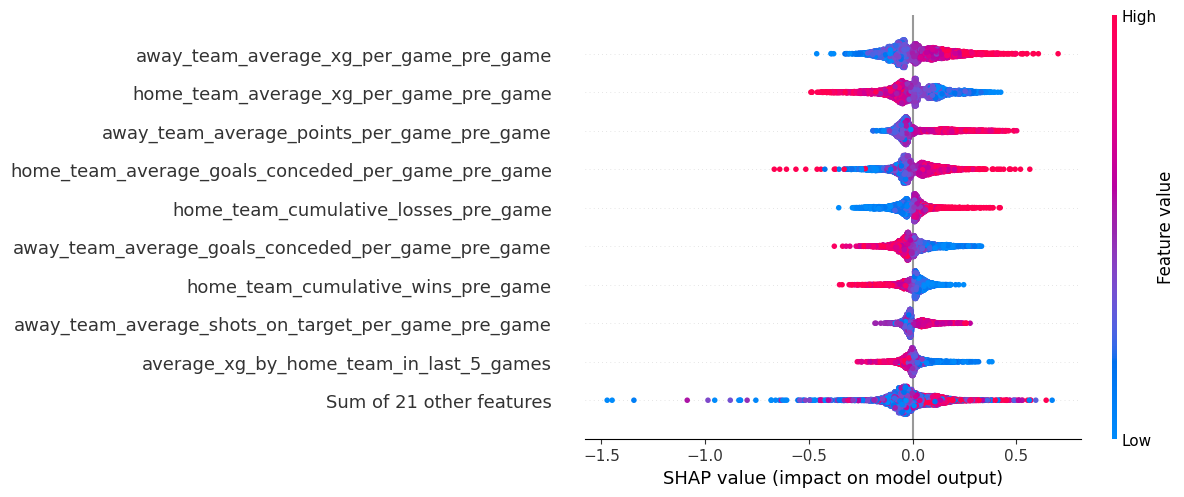

In [79]:
shap.plots.beeswarm(shap_values)

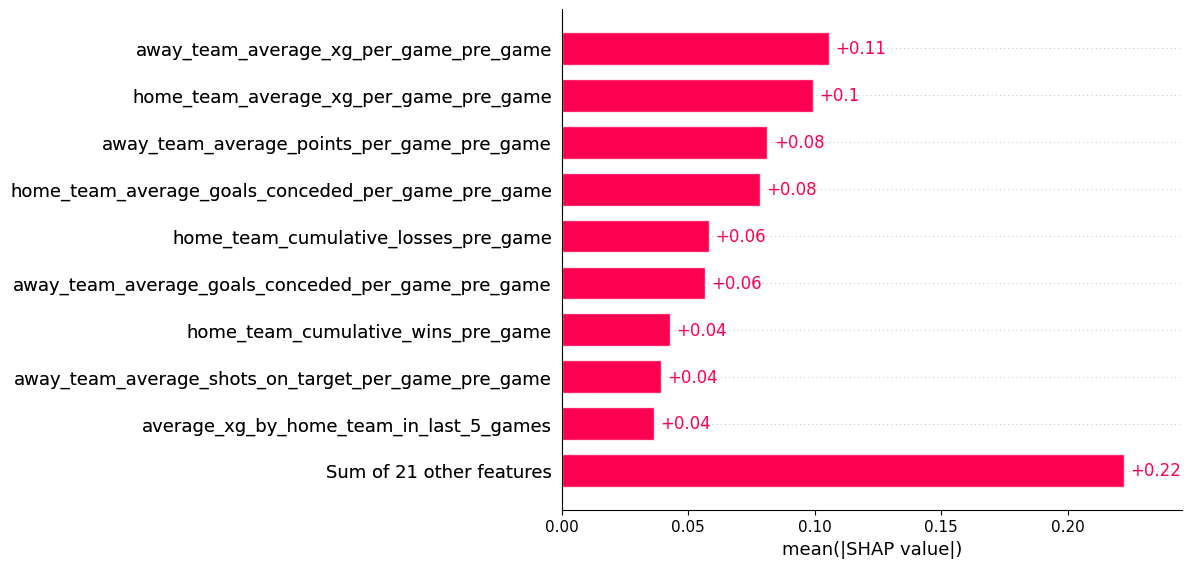

In [72]:
shap.plots.bar(shap_values)

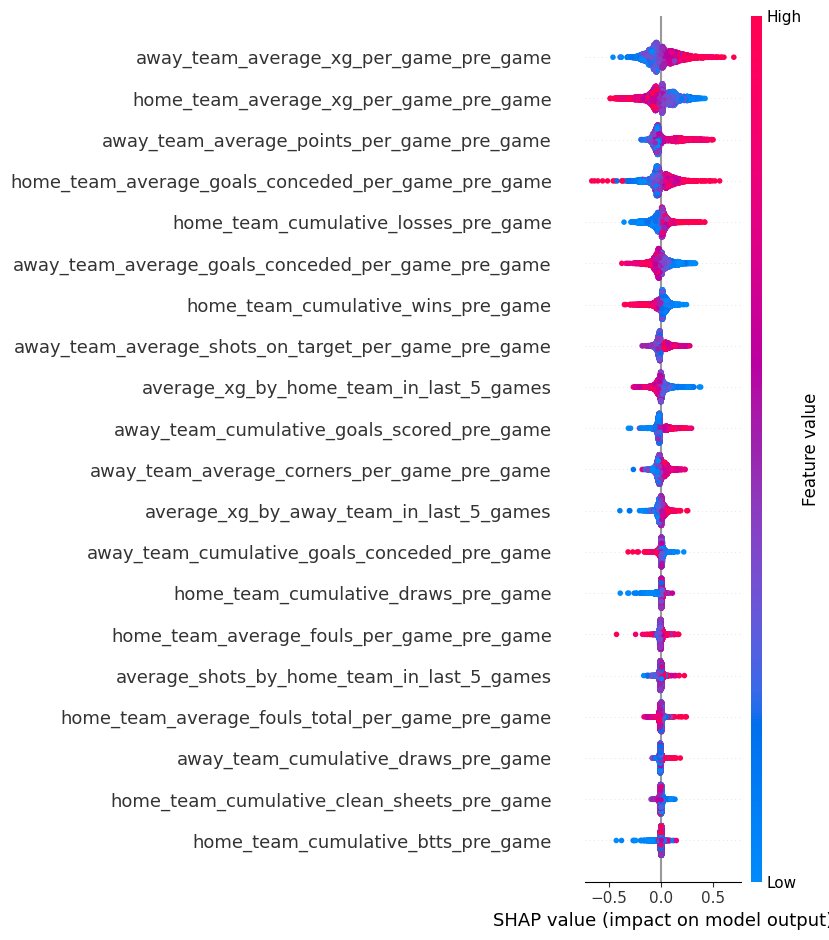

In [73]:
shap.summary_plot(shap_values)

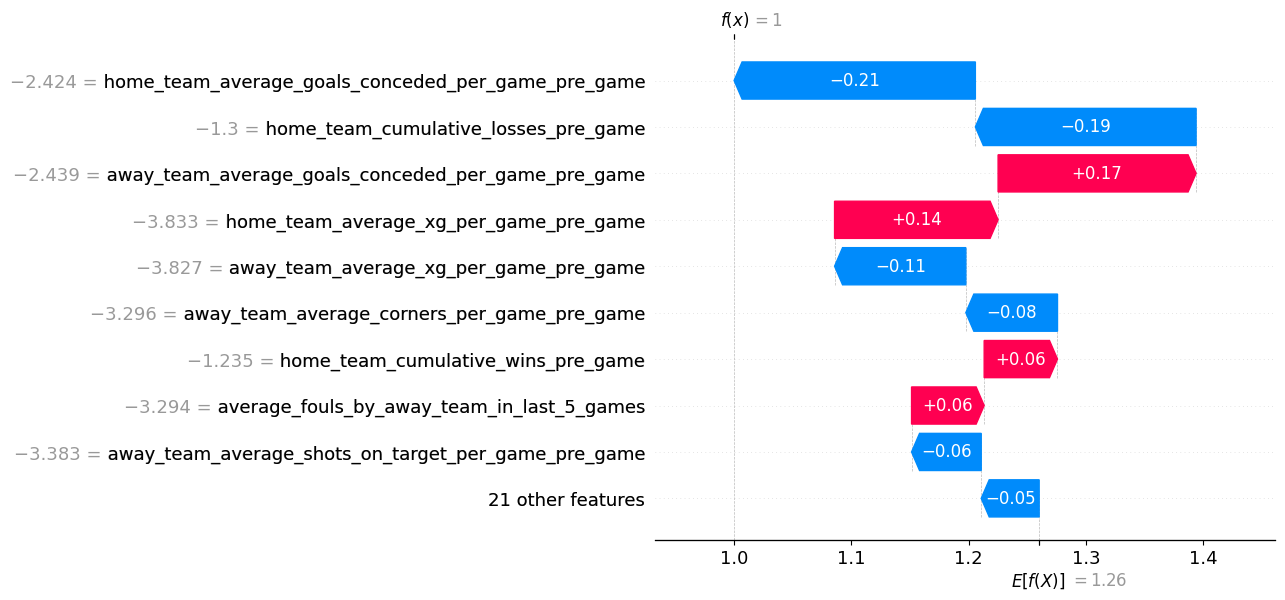

In [76]:
shap.plots.waterfall(shap_values[0])

In [78]:
shap.plots.force(shap_values)

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

### Hyperparameter tuning

In [39]:
def objective(trial):
    param = {
        'loss_function': 'MultiClass',
        'iterations': trial.suggest_int('iterations', 50, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 10),
        'border_count': trial.suggest_int('border_count', 5, 255),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'random_state': 42
    }

    model = CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False, early_stopping_rounds=100)

    y_pred = model.predict(X_test)
    # predictions = np.argmax(y_pred, axis=1)
    
    acc = accuracy_score(y_test, y_pred)
    
    return acc

In [40]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-08-22 18:01:16,045] A new study created in memory with name: no-name-c277b75e-95dc-4418-a263-d3ddd50fb311
[I 2024-08-22 18:01:19,254] Trial 0 finished with value: 0.5197596066290293 and parameters: {'iterations': 50, 'learning_rate': 0.11622052754215975, 'depth': 8, 'l2_leaf_reg': 10, 'border_count': 95, 'bagging_temperature': 0.00269550115032946, 'random_strength': 11}. Best is trial 0 with value: 0.5197596066290293.
[I 2024-08-22 18:01:27,255] Trial 1 finished with value: 0.5217628847204516 and parameters: {'iterations': 584, 'learning_rate': 0.2159480499114148, 'depth': 8, 'l2_leaf_reg': 4, 'border_count': 194, 'bagging_temperature': 0.6623553708933129, 'random_strength': 48}. Best is trial 1 with value: 0.5217628847204516.
[I 2024-08-22 18:01:30,840] Trial 2 finished with value: 0.5201238390092879 and parameters: {'iterations': 72, 'learning_rate': 0.1293743901275026, 'depth': 8, 'l2_leaf_reg': 10, 'border_count': 165, 'bagging_temperature': 0.0867772531662635, 'random_stre

In [45]:
catboost_optuna_best_params = study.best_params
catboost_optuna_best_acc = study.best_value

In [44]:
study.best_value

0.52740848661446

## Selecting best model

In [58]:
pd.options.display.float_format = '{:,.4f}'.format

In [60]:
pd.DataFrame({
    'xgboost': xgb_optuna_best_acc,
    'lightgbm': lgbm_optuna_best_acc,
    'catboost': catboost_optuna_best_acc
}, index=[0])

,xgboost,lightgbm,catboost
0,0.5261,0.5254,0.5274


# Models interpretability

# Score prediction (home_team_goal_count, away_team_goal_count)

In [26]:
selected_features = ['odds_ft_home_team_win', 'odds_ft_away_team_win', 'odds_ft_draw',
       'average_xg_by_home_team_in_last_5_games',
       'away_team_cumulative_losses_pre_game',
       'home_team_cumulative_btts_pre_game',
       'away_team_cumulative_draws_pre_game',
       'home_team_cumulative_wins_pre_game',
       'home_team_cumulative_losses_pre_game',
       'home_team_cumulative_draws_pre_game',
       'home_team_average_xg_per_game_pre_game',
       'away_team_average_goals_conceded_per_game_pre_game',
       'average_shots_by_home_team_in_last_5_games',
       'away_team_average_xg_per_game_pre_game',
       'away_team_average_points_per_game_pre_game',
       'average_total_fouls_in_away_team_games_in_last_5_games',
       'average_fouls_by_away_team_in_last_5_games',
       'home_team_average_fouls_per_game_pre_game',
       'away_team_cumulative_goals_conceded_pre_game',
       'home_team_average_fouls_total_per_game_pre_game',
       'home_team_average_shots_per_game_pre_game',
       'away_team_average_corners_per_game_pre_game',
       'average_total_fouls_in_home_team_games_in_last_5_games',
       'odds_btts_yes', 'average_xg_by_away_team_in_last_5_games',
       'away_team_cumulative_goals_scored_pre_game',
       'away_team_average_shots_on_target_per_game_pre_game',
       'home_team_average_goals_conceded_per_game_pre_game',
       'home_team_cumulative_clean_sheets_pre_game',
       'average_fouls_by_home_team_in_last_5_games']

In [27]:
data = pd.read_csv('data/modelling_data.csv')

In [29]:
X = data[selected_features]
y = data['result']

## Home team model

In [267]:
home_team_features = [col for col in X.columns if 'away' not in col]

In [268]:
X_home = X[home_team_features]

In [269]:
X_home.shape

(36085, 80)

In [271]:
X_home.drop('const', axis=1, inplace=True)

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\3349698274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_home.drop('const', axis=1, inplace=True)


In [278]:
num_features = X_home.select_dtypes(include='number').columns

In [279]:
X_home[num_features] = StandardScaler().fit_transform(X_home[num_features])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\2649532679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_home[num_features] = StandardScaler().fit_transform(X_home[num_features])


In [286]:
X_home = X_home.select_dtypes(include='number')

In [287]:
y_home = data['home_team_goal_count']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X_home, y_home, test_size=.2, random_state=42)

In [289]:
import xgboost as xgb

# Define the model
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [60]:
import joblib

# Save the model to disk
joblib.dump(model, 'xgb_home_model.pkl')  # Change filename for away model

['xgb_home_model.pkl']

In [291]:
from sklearn.metrics import mean_squared_error

# Predict on the testing set
preds = model.predict(X_test)

# Evaluate the predictions
mse = mean_squared_error(y_test, preds)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.4830709122697179


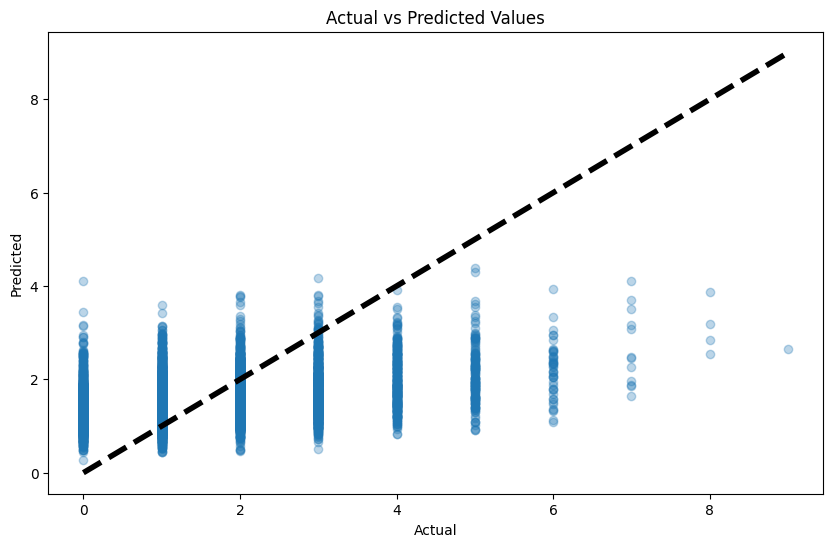

In [36]:
import matplotlib.pyplot as plt

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


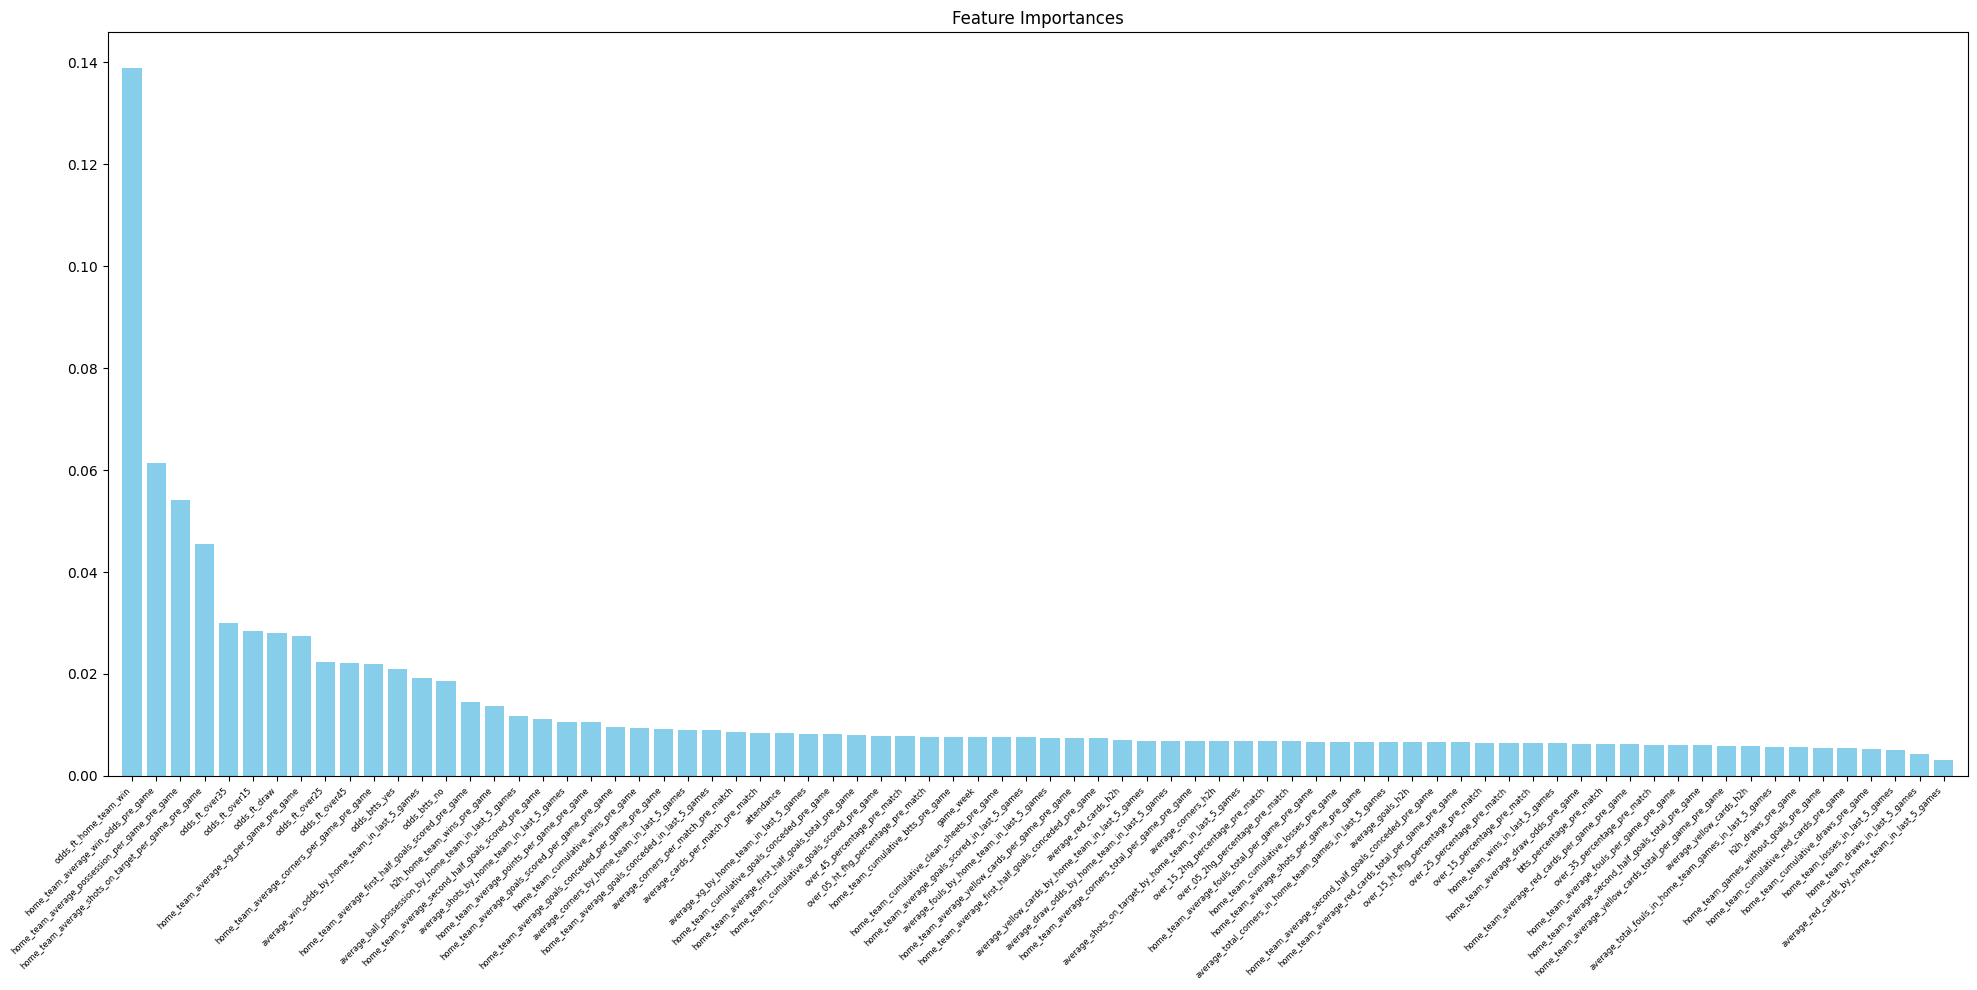

In [44]:
# Plotting feature importances
features = X_home.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 10))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=45, ha='right', fontsize=6)  # Rotate labels for better fit and adjust fontsize
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X_home, y_home, test_size=.2, random_state=42)

## XGBRegressor - hyperparameter tuning - home team goals

In [323]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective_xgbr(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 10.0)
    }
    
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

In [324]:
study_xgbr = optuna.create_study(direction='minimize')
study_xgbr.optimize(objective_xgbr, n_trials=100)

print('Number of finished trials:', len(study_xgbr.trials))
print('Best trial:', study_xgbr.best_trial.params)

[I 2024-07-24 10:23:43,195] A new study created in memory with name: no-name-d504acb9-79e7-4f86-b69d-bc45029fc9ef
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\3576329706.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
[I 2024-07-24 10:23:46,679] Trial 0 finished with value: 1.2181227119538158 and parameters: {'n_estimators': 261, 'max_depth': 7, 'learning_rate': 0.006040493138921501, 'subsample': 0.6040380989104897, 'colsample_bytree': 0.9704917573787883, 'alpha': 1.2349965672927317, 'lambda': 6.592256418802336}. Best is trial 0 with value: 1.2181227119538158.
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\3576329706.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

Number of finished trials: 100
Best trial: {'n_estimators': 912, 'max_depth': 3, 'learning_rate': 0.005206986536335056, 'subsample': 0.5975305485312352, 'colsample_bytree': 0.9059471647656043, 'alpha': 9.053439781011663, 'lambda': 1.086804740596587}


In [326]:
study_xgbr.best_value

1.2119139985499552

In [325]:
xgb_goals_best_params = study_xgbr.best_params
xgb_goals_best_params

{'n_estimators': 912,
 'max_depth': 3,
 'learning_rate': 0.005206986536335056,
 'subsample': 0.5975305485312352,
 'colsample_bytree': 0.9059471647656043,
 'alpha': 9.053439781011663,
 'lambda': 1.086804740596587}

## CatboostRegressor - hyperparameter tuning - home_team_goals

In [317]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
        'od_type': 'Iter',
        'od_wait': 50
    }
    model = CatBoostRegressor(**params, verbose=False)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    return rmse

study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=100)
print('Best CatBoost parameters:', study_catboost.best_params)

[I 2024-07-24 10:04:29,767] A new study created in memory with name: no-name-e4b22ee7-2a8e-4bec-9222-9ca46e3c8121
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\2603100847.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\2603100847.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
[I 2024-07-24 10:04:32,007] Trial 0 finished with value: 1.3137413554559891 and parameters: {'iterations': 217, 'depth': 5, 'learning_rate': 0.00017859368559670924, 'random_stre

Best CatBoost parameters: {'iterations': 806, 'depth': 8, 'learning_rate': 0.022847064189339523, 'random_strength': 0, 'bagging_temperature': 0.4475654928706755}


In [318]:
catboost_goals_best_params = study_catboost.best_params
catboost_goals_best_params

{'iterations': 806,
 'depth': 8,
 'learning_rate': 0.022847064189339523,
 'random_strength': 0,
 'bagging_temperature': 0.4475654928706755}

In [319]:
study_catboost.best_value

1.2112358370415157

## LGBMRegressor - hyperparameter tuning - home team goals

In [313]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import optuna

def objective_lgbmr(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [314]:
study_lgbmr = optuna.create_study(direction='minimize')
study_lgbmr.optimize(objective_lgbmr, n_trials=100)
print('Best CatBoost parameters:', study_lgbmr.best_params)

[I 2024-07-24 09:33:48,305] A new study created in memory with name: no-name-06bf1380-6c9f-4470-a077-423ccd37e824
[I 2024-07-24 09:33:56,783] Trial 0 finished with value: 1.2204343518281033 and parameters: {'learning_rate': 0.0017537999402692148, 'num_leaves': 66, 'subsample': 0.5813525284816605, 'colsample_bytree': 0.4660543935251625, 'min_data_in_leaf': 76}. Best is trial 0 with value: 1.2204343518281033.
[I 2024-07-24 09:34:06,241] Trial 1 finished with value: 1.2203297533972026 and parameters: {'learning_rate': 0.006873597007856843, 'num_leaves': 924, 'subsample': 0.2890840841344476, 'colsample_bytree': 0.33838134715002816, 'min_data_in_leaf': 67}. Best is trial 1 with value: 1.2203297533972026.
[I 2024-07-24 09:34:30,180] Trial 2 finished with value: 1.2260679515621946 and parameters: {'learning_rate': 0.0014990075941815248, 'num_leaves': 694, 'subsample': 0.3529918221597941, 'colsample_bytree': 0.38619867900625593, 'min_data_in_leaf': 28}. Best is trial 1 with value: 1.2203297533

Best CatBoost parameters: {'learning_rate': 0.002747921503429778, 'num_leaves': 193, 'subsample': 0.3460956679948684, 'colsample_bytree': 0.6700040449943433, 'min_data_in_leaf': 97}


In [321]:
study_lgbmr.best_value

1.2141186645165176

In [322]:
lgbmr_goals_best_params = study_lgbmr.best_params
lgbmr_goals_best_params

{'learning_rate': 0.002747921503429778,
 'num_leaves': 193,
 'subsample': 0.3460956679948684,
 'colsample_bytree': 0.6700040449943433,
 'min_data_in_leaf': 97}

## Away team model

In [327]:
away_team_features = [col for col in X.columns if 'home' not in col]

In [328]:
X_away = X[away_team_features]

In [329]:
X_away.drop('const', axis=1, inplace=True)

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\2245908840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_away.drop('const', axis=1, inplace=True)


In [330]:
num_features = X_away.select_dtypes(include='number').columns

In [331]:
X_away[num_features] = StandardScaler().fit_transform(X_away[num_features])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\1043513663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_away[num_features] = StandardScaler().fit_transform(X_away[num_features])


In [332]:
X_away = X_away.select_dtypes(include='number')

In [333]:
y_away = data['away_team_goal_count']

In [334]:
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, test_size=.2, random_state=42)

## XGBRegressor - hyperparameter tuning - away team goals

In [335]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective_xgbr_away(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-5, 10.0),
        'lambda': trial.suggest_float('lambda', 1e-5, 10.0)
    }
    
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train_away, y_train_away)
    preds = model.predict(X_test_away)
    rmse = mean_squared_error(y_test_away, preds, squared=False)
    return rmse

In [338]:
study_xgbr_away = optuna.create_study(direction='minimize')
study_xgbr_away.optimize(objective_xgbr_away, n_trials=100)

print('Number of finished trials:', len(study_xgbr_away.trials))
print('Best trial:', study_xgbr_away.best_trial.params)

[I 2024-07-24 10:50:49,466] A new study created in memory with name: no-name-c156b6c1-7811-45c3-a693-c668f341073b
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\2933883155.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
[I 2024-07-24 10:51:22,690] Trial 0 finished with value: 1.0944539262685529 and parameters: {'n_estimators': 215, 'max_depth': 15, 'learning_rate': 0.056052253024333566, 'subsample': 0.8942723177615007, 'colsample_bytree': 0.967841916756869, 'alpha': 1.9120961692787473, 'lambda': 5.446780738453829}. Best is trial 0 with value: 1.0944539262685529.
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\2933883155.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://githu

Number of finished trials: 100
Best trial: {'n_estimators': 739, 'max_depth': 3, 'learning_rate': 0.00582530555363583, 'subsample': 0.8763945294011003, 'colsample_bytree': 0.9865084690237539, 'alpha': 0.6599981425394298, 'lambda': 0.1219602761550706}


In [340]:
study_xgbr_away.best_value

1.07241854186576

In [339]:
xgbr_away_goals_best_params = study_xgbr_away.best_params
xgbr_away_goals_best_params

{'n_estimators': 739,
 'max_depth': 3,
 'learning_rate': 0.00582530555363583,
 'subsample': 0.8763945294011003,
 'colsample_bytree': 0.9865084690237539,
 'alpha': 0.6599981425394298,
 'lambda': 0.1219602761550706}

## CatBoostRegressor - hyperparameter tuning - away team goals

In [341]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective_catboost_away(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
        'od_type': 'Iter',
        'od_wait': 50
    }
    model = CatBoostRegressor(**params, verbose=False)
    model.fit(X_train_away, y_train_away, eval_set=[(X_test_away, y_test_away)], early_stopping_rounds=50)
    preds = model.predict(X_test_away)
    rmse = mean_squared_error(y_test_away, preds, squared=False)
    return rmse

study_catboost_away = optuna.create_study(direction='minimize')
study_catboost_away.optimize(objective_catboost_away, n_trials=100)
# print('Best CatBoost parameters:', study_catboost_away.best_params)

[I 2024-07-24 11:08:11,088] A new study created in memory with name: no-name-5c10f022-a24e-4ede-bb6c-26e2ab8188c0
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\3333738149.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33156\3333738149.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.0),
[I 2024-07-24 11:08:15,182] Trial 0 finished with value: 1.1452194876136494 and parameters: {'iterations': 207, 'depth': 7, 'learning_rate': 6.63735091427427e-05, 'random_streng

In [343]:
study_catboost_away.best_value

1.0719925259263094

In [344]:
cb_goals_away_best_params = study_catboost_away.best_params
cb_goals_away_best_params

{'iterations': 477,
 'depth': 6,
 'learning_rate': 0.05830950674658578,
 'random_strength': 0,
 'bagging_temperature': 1.5458239927073953}

## LGBMRegressor - hyperparameter tuning - away team goals

In [345]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import optuna

def objective_lgbmr_away(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "n_estimators": 1000,
        "verbosity": -1,
        "bagging_freq": 1,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 2**10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = lgb.LGBMRegressor(**params)
    model.fit(X_train_away, y_train_away)
    predictions = model.predict(X_test_away)
    rmse = mean_squared_error(y_test_away, predictions, squared=False)
    return rmse

In [346]:
study_lgbmr_away = optuna.create_study(direction='minimize')
study_lgbmr_away.optimize(objective_lgbmr_away, n_trials=100)
# print('Best CatBoost parameters:', study_lgbmr.best_params)

[I 2024-07-24 11:25:59,530] A new study created in memory with name: no-name-02a57571-d2ea-4f0e-abc0-0747c40f365f
[I 2024-07-24 11:26:14,371] Trial 0 finished with value: 1.0883976308987504 and parameters: {'learning_rate': 0.013725507077557016, 'num_leaves': 1011, 'subsample': 0.3257547132330944, 'colsample_bytree': 0.9356661472348473, 'min_data_in_leaf': 88}. Best is trial 0 with value: 1.0883976308987504.
[I 2024-07-24 11:26:25,788] Trial 1 finished with value: 1.094936749254563 and parameters: {'learning_rate': 0.021734510996079467, 'num_leaves': 785, 'subsample': 0.4386972149120134, 'colsample_bytree': 0.2690158701911434, 'min_data_in_leaf': 90}. Best is trial 0 with value: 1.0883976308987504.
[I 2024-07-24 11:26:44,321] Trial 2 finished with value: 1.090341178071237 and parameters: {'learning_rate': 0.01463385725895191, 'num_leaves': 789, 'subsample': 0.49353267907678794, 'colsample_bytree': 0.5466254952330177, 'min_data_in_leaf': 99}. Best is trial 0 with value: 1.08839763089875

In [348]:
study_lgbmr_away.best_value

1.0733164690834092

In [349]:
lgbmr_goals_away_best_params = study_lgbmr_away.best_params
lgbmr_goals_away_best_params

{'learning_rate': 0.002881489749228113,
 'num_leaves': 977,
 'subsample': 0.27270826320126973,
 'colsample_bytree': 0.9309650045774821,
 'min_data_in_leaf': 92}

In [57]:
import joblib

# Save the model to disk
joblib.dump(model, 'xgb_away_model.pkl')  # Change filename for away model

['xgb_away_model.pkl']

## Loading pretrained models

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.externals import joblib
from scipy.stats import poisson

In [61]:
home_model = joblib.load(r'xgb_home_model.pkl')
away_model = joblib.load(r'xgb_away_model.pkl')

In [70]:
home_goals_expected = home_model.predict(X_home)
away_goals_expected = away_model.predict(X_away)

In [71]:
# Generate Poisson distributions based on the predicted averages
max_goals = 9
score_matrix = np.zeros((max_goals+1, max_goals+1))

In [74]:
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(X_home, y_home, test_size=.2, random_state=42)
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(X_away, y_away, test_size=.2, random_state=42)

In [68]:
import numpy as np
from scipy.stats import poisson

# Assuming 'home_model' and 'away_model' are your trained models
# and 'X_home' and 'X_away' are your feature sets for the predictions

# Generate Poisson distributions based on the predicted averages
max_goals = 9
score_matrix = np.zeros((max_goals+1, max_goals+1))

for i in range(max_goals+1):
    for j in range(max_goals+1):
        home_prob = poisson.pmf(i, home_goals_expected)
        away_prob = poisson.pmf(j, away_goals_expected)
        score_matrix[i][j] = home_prob * away_prob

# Example usage: probability of a 2-1 home win
print(f"Probability of a 2-1 home win: {score_matrix[2][1]:.2%}")

ValueError: setting an array element with a sequence.

In [75]:
home_goals_expected = home_model.predict(X_test_home)
away_goals_expected = away_model.predict(X_test_away)

In [83]:
len(home_goals_expected)

7217

In [84]:
X_test

,attendance,game_week,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_ht_fhg_percentage_pre_match,over_05_ht_fhg_percentage_pre_match,over_15_2hg_percentage_pre_match,over_05_2hg_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,home_team_cumulative_goals_scored_pre_game,home_team_cumulative_goals_conceded_pre_game,home_team_average_goals_scored_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,home_team_average_first_half_goals_scored_pre_game,home_team_average_second_half_goals_scored_pre_game,home_team_average_first_half_goals_conceded_pre_game,home_team_average_second_half_goals_conceded_pre_game,home_team_average_first_half_goals_total_pre_game,home_team_average_second_half_goals_total_pre_game,home_team_average_corners_total_per_game_pre_game,home_team_average_corners_per_game_pre_game,home_team_average_yellow_cards_total_per_game_pre_game,home_team_average_yellow_cards_per_game_pre_game,home_team_cumulative_red_cards_pre_game,home_team_average_red_cards_total_per_game_pre_game,home_team_average_red_cards_per_game_pre_game,home_team_average_shots_per_game_pre_game,home_team_average_shots_on_target_per_game_pre_game,home_team_average_fouls_per_game_pre_game,home_team_average_fouls_total_per_game_pre_game,home_team_average_possession_per_game_pre_game,home_team_average_xg_per_game_pre_game,home_team_games_without_goals_pre_game,home_team_cumulative_btts_pre_game,home_team_cumulative_clean_sheets_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_draws_pre_game,home_team_cumulative_losses_pre_game,home_team_average_points_per_game_pre_game,home_team_wins_in_last_5_games,home_team_draws_in_last_5_games,home_team_losses_in_last_5_games,home_team_average_goals_scored_in_last_5_games,home_team_average_goals_conceded_in_last_5_games,average_total_corners_in_home_team_games_in_last_5_games,average_corners_by_home_team_in_last_5_games,average_yellow_cards_by_home_team_in_last_5_games,average_red_cards_by_home_team_in_last_5_games,average_ball_possession_by_home_team_in_last_5_games,average_xg_by_home_team_in_last_5_games,average_shots_by_home_team_in_last_5_games,average_shots_on_target_by_home_team_in_last_5_games,average_total_fouls_in_home_team_games_in_last_5_games,average_fouls_by_home_team_in_last_5_games,h2h_home_team_wins_pre_game,h2h_draws_pre_game,average_goals_h2h,average_yellow_cards_h2h,average_red_cards_h2h,average_corners_h2h,home_team_average_win_odds_pre_game,home_team_average_draw_odds_pre_game,average_win_odds_by_home_team_in_last_5_games,average_draw_odds_by_home_team_in_last_5_games
27849,0.00,21.00,35,75,50,20,15,30,80,40,80,10.70,3.50,3.15,3.65,1.25,1.67,2.45,4.60,1.53,2.35,27,24,1.42,1.26,0.89,0.53,0.47,0.53,0.89,0.53,9.37,4.05,3.21,1.47,0.00,0.11,0.00,11.42,5.42,12.00,24.26,54.42,1.41,5.00,8.00,8.00,8.00,5.00,6.00,1.53,1.00,2.00,2.00,0.40,1.00,8.60,3.40,1.40,0.00,52.00,1.17,9.00,4.40,23.60,11.40,3,0,4.33,3.67,0.00,13.00,3.42,3.71,4.03,3.75
10964,100.00,9.00,75,75,63,13,13,25,63,50,88,8.00,5.75,1.80,3.50,1.30,1.70,3.35,6.50,1.73,1.95,10,10,1.25,1.25,0.62,0.62,0.50,0.62,0.62,0.62,9.25,4.25,3.50,1.62,1.00,0.25,0.12,9.75,5.12,12.00,21.75,42.00,1.29,2.00,4.00,2.00,3.00,2.00,3.00,1.38,2.00,1.00,2.00,0.60,1.00,8.80,3.40,1.60,0.20,39.40,1.19,8.80,4.80,20.20,10.80,0,3,2.25,4.25,0.25,10.00,3.61,3.52,3.21,3.42
29162,39805.20,38.00,59,89,70,53,25,47,81,67,92,11.39,5.00,1.47,5.25,1.08,1.23,1.66,2.66,1.40,2.75,75,62,2.03,1.68,0.97,1.05,0.62,1.05,0.97,1.05,10.30,5.30,5.38,2.84,4.00,0.22,0.11,11.73,6.68,11.92,24.24,59.03,1.59,6.00,24.00,8.00,17.00,9.00,11.00,1.62,4.00,1.00,0.00,2.80,1.00,10.80,5.60,2.20,0.20,58.80,1.79,14.20,8.00,25.80,12.40,3,2,2.43,3.14,0.00,12.86,2.39,4.09,2.15,3.76
30468,14979.46,32.00,50,72,53,41,13,32,66,47

In [76]:
import numpy as np
from scipy.stats import poisson

max_goals = 9
# Create a 3D array to hold probabilities for each match scenario if you have multiple matches
num_matches = len(home_goals_expected)  # Assuming the length is the number of matches
score_matrix = np.zeros((num_matches, max_goals+1, max_goals+1))

for match_index in range(num_matches):
    for i in range(max_goals+1):
        for j in range(max_goals+1):
            home_prob = poisson.pmf(i, home_goals_expected[match_index])
            away_prob = poisson.pmf(j, away_goals_expected[match_index])
            score_matrix[match_index][i][j] = home_prob * away_prob


In [358]:
home_goals = home_goals_expected[0]  # Assuming the first match
away_goals = away_goals_expected[0]
score_matrix = np.zeros((max_goals+1, max_goals+1))

for i in range(max_goals+1):
    for j in range(max_goals+1):
        home_prob = poisson.pmf(i, home_goals)
        away_prob = poisson.pmf(j, away_goals)
        score_matrix[i][j] = home_prob * away_prob

# Example usage: probability of a 2-1 home win
print(f"Probability of a 2-1 home win: {score_matrix[2][1]:.2%}")


Probability of a 2-1 home win: 8.03%


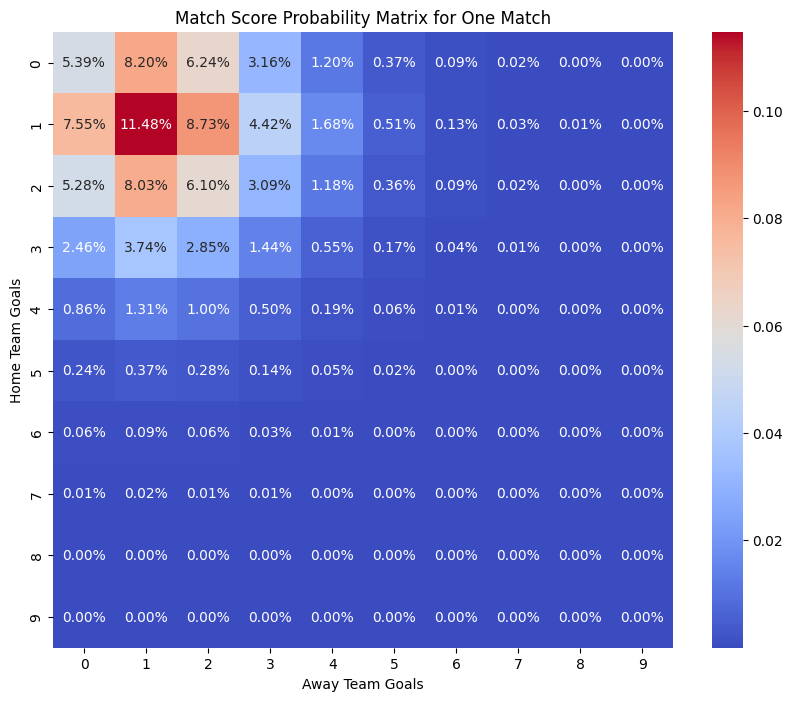

In [359]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(score_matrix, annot=True, fmt=".2%", cmap='coolwarm')
plt.title('Match Score Probability Matrix for One Match')
plt.xlabel('Away Team Goals')
plt.ylabel('Home Team Goals')
plt.show()


In [82]:
X.dtypes

attendance                                                  float64
home_team_name                                               object
away_team_name                                               object
game_week                                                   float64
btts_percentage_pre_match                                     int64
over_15_percentage_pre_match                                  int64
over_25_percentage_pre_match                                  int64
over_35_percentage_pre_match                                  int64
over_45_percentage_pre_match                                  int64
over_15_ht_fhg_percentage_pre_match                           int64
over_05_ht_fhg_percentage_pre_match                           int64
over_15_2hg_percentage_pre_match                              int64
over_05_2hg_percentage_pre_match                              int64
average_corners_per_match_pre_match                         float64
average_cards_per_match_pre_match               

In [264]:
X.to_csv('modelling_data/modelling_data.csv', index=False)

# Betting simulation

In [53]:
import numpy as np

# Losowy wybór 100 próbek z zestawu testowego
random_indices = np.random.choice(X_test.index, size=1000, replace=False)

# Wyodrębnienie losowych 100 próbek
X_test_random = X_test.loc[random_indices]
y_test_random = y_test.loc[random_indices]

# Przyjmijmy, że 'odds_ft_home_team_win', 'odds_ft_away_team_win' i 'odds_ft_draw' to odpowiednie kolumny w X_test_random
kursy_home = X_test_random['odds_ft_home_team_win'].values
kursy_away = X_test_random['odds_ft_away_team_win'].values
kursy_draw = X_test_random['odds_ft_draw'].values

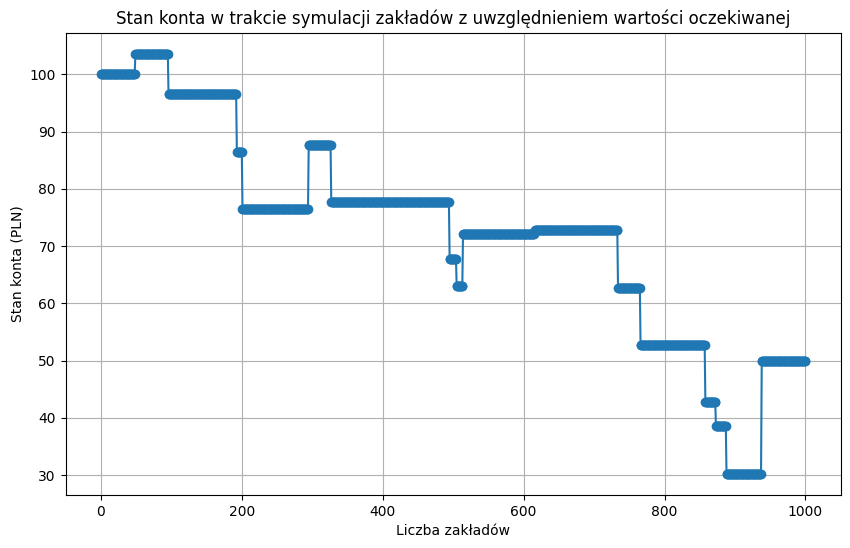

In [146]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Losowy wybór 100 próbek z zestawu testowego
random_indices = np.random.choice(X_test.index, size=1000, replace=False)

# Wyodrębnienie losowych 100 próbek
X_test_random = X_test.loc[random_indices]
y_test_random = y_test.loc[random_indices]

# Przyjmijmy, że 'odds_ft_home_team_win', 'odds_ft_away_team_win' i 'odds_ft_draw' to odpowiednie kolumny w X_test_random
kursy_home = X_test_random['odds_ft_home_team_win'].values
kursy_away = X_test_random['odds_ft_away_team_win'].values
kursy_draw = X_test_random['odds_ft_draw'].values


# Początkowy budżet
budżet = 100.0
stawka = 10.0

# Lista do przechowywania stanu konta w czasie symulacji
stany_konta = [budżet]

# Symulacja zakładów z uwzględnieniem wartości oczekiwanej (EV)
for i in range(len(model_predictions)):
    # Znalezienie etykiety z najwyższym prawdopodobieństwem
    predicted_label = np.argmax(model_predictions[i])
    true_label = true_labels.iloc[i]
    
    # Odpowiedni kurs dla przewidywanego wyniku
    if predicted_label == 0:
        kurs = kursy_home[i]
    elif predicted_label == 1:
        kurs = kursy_away[i]
    else:
        kurs = kursy_draw[i]
    
    # Obliczenie wartości oczekiwanej (EV)
    prawdopodobieństwo_wygranej = model_predictions[i][predicted_label]
    ev = (prawdopodobieństwo_wygranej * kurs) - (1 - prawdopodobieństwo_wygranej)
    
    if ev > 0:
        # Obstawiamy tylko wtedy, gdy EV jest dodatnie
        if predicted_label == true_label:
            # Wygrana zakład
            wygrana = stawka * kurs
            budżet += wygrana - stawka  # Dodajemy wygraną, ale odejmujemy stawkę, bo już była odjęta wcześniej
        else:
            # Przegrana zakład
            budżet -= stawka
    
    # Zapisanie stanu konta
    stany_konta.append(budżet)

# Krok 3: Rysowanie wykresu stanu konta
plt.figure(figsize=(10, 6))
plt.plot(stany_konta, marker='o')
plt.title('Stan konta w trakcie symulacji zakładów z uwzględnieniem wartości oczekiwanej')
plt.xlabel('Liczba zakładów')
plt.ylabel('Stan konta (PLN)')
plt.grid(True)
plt.show()


Stop-loss osiągnięty. Symulacja zakończona.


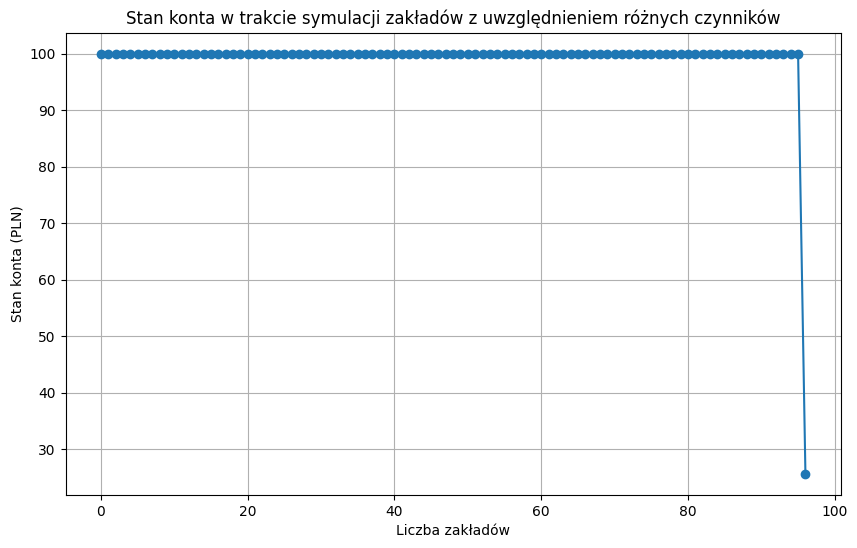

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Definicje zmiennych
marża = 0.05  # Marża bukmacherska 5%
zmienność_kursu = 0.1  # Zmienność kursów ±10%
stop_loss_threshold = 50.0  # Stop-loss, przestajemy zakładać się, gdy budżet spadnie poniżej 50 zł
stop_gain_threshold = 200.0  # Stop-gain, kończymy symulację, gdy budżet osiągnie 200 zł

# Początkowy budżet
budżet = 100.0
stawka = 10.0

# Lista do przechowywania stanu konta w czasie symulacji
stany_konta = [budżet]

# Symulacja zakładów z uwzględnieniem wartości oczekiwanej (EV)
for i in range(len(model_predictions)):
    # Znalezienie etykiety z najwyższym prawdopodobieństwem
    predicted_label = np.argmax(model_predictions[i])
    true_label = true_labels.iloc[i]
    
    # Odpowiedni kurs dla przewidywanego wyniku, uwzględnienie marży i zmienności kursu
    if predicted_label == 0:
        kurs = kursy_home[i] * (1 - marża)
    elif predicted_label == 1:
        kurs = kursy_away[i] * (1 - marża)
    else:
        kurs = kursy_draw[i] * (1 - marża)
    
    # Dodanie zmienności kursu
    kurs *= np.random.uniform(1 - zmienność_kursu, 1 + zmienność_kursu)
    
    # Obliczenie wartości oczekiwanej (EV)
    prawdopodobieństwo_wygranej = model_predictions[i][predicted_label]
    ev = (prawdopodobieństwo_wygranej * kurs) - (1 - prawdopodobieństwo_wygranej)
    
    # Zastosowanie kryterium Kelly'ego
    b = kurs - 1
    q = 1 - prawdopodobieństwo_wygranej
    f_star = (b * prawdopodobieństwo_wygranej - q) / b
    stawka = budżet * f_star if f_star > 0 else 0
    
    if ev > 0 and stawka > 0:
        # Obstawiamy tylko wtedy, gdy EV jest dodatnie i stawka > 0
        if predicted_label == true_label:
            # Wygrana zakład
            wygrana = stawka * kurs
            budżet += wygrana - stawka  # Dodajemy wygraną, ale odejmujemy stawkę, bo już była odjęta wcześniej
        else:
            # Przegrana zakład
            budżet -= stawka
    
    # Zapisanie stanu konta
    stany_konta.append(budżet)
    
    # Sprawdzenie warunków stop-loss i stop-gain
    if budżet <= stop_loss_threshold:
        print("Stop-loss osiągnięty. Symulacja zakończona.")
        break
    elif budżet >= stop_gain_threshold:
        print("Stop-gain osiągnięty. Symulacja zakończona.")
        break

# Krok 3: Rysowanie wykresu stanu konta
plt.figure(figsize=(10, 6))
plt.plot(stany_konta, marker='o')
plt.title('Stan konta w trakcie symulacji zakładów z uwzględnieniem różnych czynników')
plt.xlabel('Liczba zakładów')
plt.ylabel('Stan konta (PLN)')
plt.grid(True)
plt.show()

In [150]:
X_test

,odds_ft_home_team_win,odds_ft_away_team_win,odds_ft_draw,average_xg_by_home_team_in_last_5_games,away_team_cumulative_losses_pre_game,home_team_cumulative_btts_pre_game,away_team_cumulative_draws_pre_game,home_team_cumulative_wins_pre_game,home_team_cumulative_losses_pre_game,home_team_cumulative_draws_pre_game,home_team_average_xg_per_game_pre_game,away_team_average_goals_conceded_per_game_pre_game,average_shots_by_home_team_in_last_5_games,away_team_average_xg_per_game_pre_game,away_team_average_points_per_game_pre_game,average_total_fouls_in_away_team_games_in_last_5_games,average_fouls_by_away_team_in_last_5_games,home_team_average_fouls_per_game_pre_game,away_team_cumulative_goals_conceded_pre_game,home_team_average_fouls_total_per_game_pre_game,home_team_average_shots_per_game_pre_game,away_team_average_corners_per_game_pre_game,average_total_fouls_in_home_team_games_in_last_5_games,odds_btts_yes,average_xg_by_away_team_in_last_5_games,away_team_cumulative_goals_scored_pre_game,away_team_average_shots_on_target_per_game_pre_game,home_team_average_goals_conceded_per_game_pre_game,home_team_cumulative_clean_sheets_pre_game,average_fouls_by_home_team_in_last_5_games
975,-0.08,-0.09,-0.11,-3.54,-1.29,-1.52,-1.33,-1.23,-1.30,-1.33,-3.83,-2.44,-3.18,-3.83,-2.17,-3.58,-3.29,-3.57,-1.46,-3.79,-3.51,-3.30,-3.58,-0.61,-3.54,-1.40,-3.38,-2.42,-1.23,-3.30
976,-0.09,-0.06,-0.19,-3.54,-1.29,-1.52,-1.33,-1.23,-1.30,-1.33,-3.83,-2.44,-3.18,-3.83,-2.17,-3.58,-3.29,-3.57,-1.46,-3.79,-3.51,-3.30,-3.58,-0.46,-3.54,-1.40,-3.38,-2.42,-1.23,-3.30
977,-0.08,-0.08,-0.13,-3.54,-1.29,-1.52,-1.33,-1.23,-1.30,-1.33,-3.83,-2.44,-3.18,-3.83,-2.17,-3.58,-3.29,-3.57,-1.46,-3.79,-3.51,-3.30,-3.58,-0.30,-3.54,-1.40,-3.38,-2.42,-1.23,-3.30
978,-0.08,-0.09,-0.11,-3.54,-1.29,-1.52,-1.33,-1.23,-1.30,-1.33,-3.83,-2.44,-3.18,-3.83,-2.17,-3.58,-3.29,-3.57,-1.46,-3.79,-3.51,-3.30,-3.58,-0.61,-3.54,-1.40,-3.38,-2.42,-1.23,-3.30
979,0.27,-0.19,0.64,-3.54,-1.29,-1.52,-1.33,-1.23,-1.30,-1.33,-3.83,-2.44,-3.18,-3.83,-2.17,-3.58,-3.29,-3.57,-1.46,-3.79,-3.51,-3.30,-3.58,0.57,-3.54,-1.40,-3.38,-2.42,-1.23,-3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36080,-0.05,-0.13,-0.55,-0.78,1.11,1.09,1.96,0.09,0.90,1.95,-0.34,-0.48,-0.67,-1.13,-0.56,0.17,-0.06,-0.21,0.43,-0.40,-0.24,-0.05,-1.43,0.57,-0.72,-0.19,-1.22,-0.20,1.14,-1.63
36081,0.09,-0.17,-0.05,0.27,-0.89,0.76,0.46,1.23,0.30,1.06,-1.07,-1.05,0.22,1.29,1.65,-0.37,-0.45,-0.48,-0.12,-0.51,-1.03,0.95,-1.04,0.38,0.78,2.05,1.33,-0.57,1.40,-0.57
36082,0.03,-0.16,-0.50,-0.02,0.91,-0.05,1.96,-0.29,1.30,1.95,-0.88,-0.23,0.39,-0.98,-0.39,-1.31,-1.34,0.46,0.68,0.44,-0.68,-1.03,-0.04,1.34,-1.28,0.16,-0.47,-0.07,1.40,-0.12
36083,-0.12,0.17,0.35,0.11,1.51,0.76,1.66,1.79,0.10,0.46,-0.27,0.52,-0.34,-0.95,-0.78,-0.40,-0.90,0.19,1.41,0.14,-0.43,-1.08,-0.34,0.04,-0.09,0.16,-0.38,-0.57,1.66,-0.62


In [151]:
X_test_with_dates = pd.merge(data['date'], X_test, on='index')

KeyError: 'date'

In [12]:
model.classes_

array([0, 1, 2], dtype=int64)

In [11]:
predictions = model.predict_proba(X_test)

In [30]:
predictions

array([[0.26971124, 0.28212512, 0.44816364],
       [0.27086744, 0.51813368, 0.21099889],
       [0.16950259, 0.70548722, 0.12501019],
       ...,
       [0.28134581, 0.50852981, 0.21012438],
       [0.25487756, 0.23630676, 0.50881568],
       [0.19657216, 0.67192443, 0.13150341]])

In [26]:
odds_home = X_test['odds_ft_home_team_win'].values
odds_away = X_test['odds_ft_away_team_win'].values
odds_draw = X_test['odds_ft_draw'].values

In [27]:
budżet = 100.0  # Początkowy budżet
stawka = 10.0  # Kwota na każdy zakład

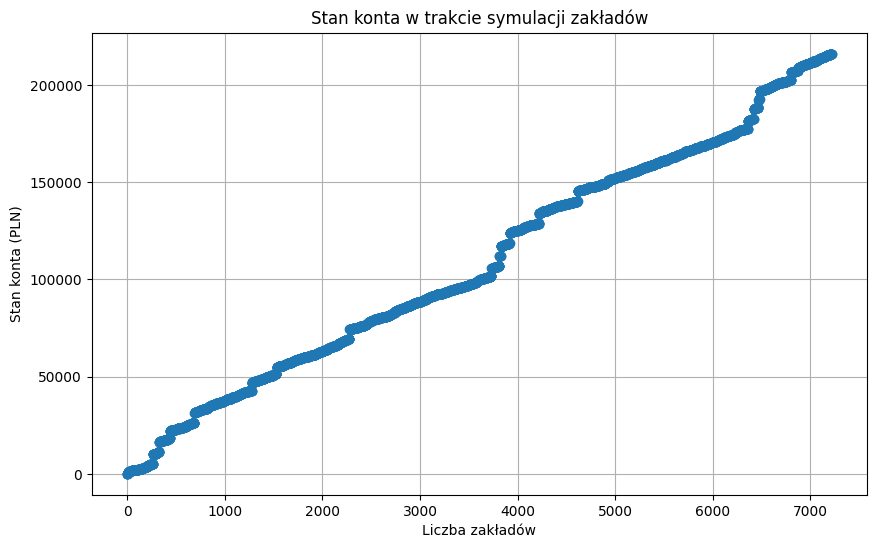

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Zakładając, że masz model, dane testowe (X_test), oraz rzeczywiste wyniki (y_test)
model_predictions = model.predict_proba(X_test)  # Przewidywania prawdopodobieństw dla każdej klasy
true_labels = np.array(y_test)  # Rzeczywiste wyniki (0 = wygrana gospodarzy, 1 = wygrana gości, 2 = remis)

# Kursy bukmacherskie w trzech kolumnach
kursy_home = X_test['odds_ft_home_team_win'].values
kursy_away = X_test['odds_ft_away_team_win'].values
kursy_draw = X_test['odds_ft_draw'].values

# Początkowy budżet
budżet = 100.0
stawka = 10.0

# Lista do przechowywania stanu konta w czasie symulacji
stany_konta = [budżet]

# Symulacja zakładów
for i in range(len(model_predictions)):
    # Znalezienie etykiety z najwyższym prawdopodobieństwem
    predicted_label = np.argmax(model_predictions[i])
    true_label = true_labels[i]
    
    # Odpowiedni kurs dla przewidywanego wyniku
    if predicted_label == 0:
        kurs = kursy_home[i]
    elif predicted_label == 1:
        kurs = kursy_away[i]
    else:
        kurs = kursy_draw[i]
    
    # Sprawdzenie, czy przewidywanie się zgadza
    if predicted_label == true_label:
        # Wygrana zakład
        wygrana = stawka * kurs
        budżet += wygrana - stawka  # Dodajemy wygraną, ale odejmujemy stawkę, bo już była odjęta wcześniej
    else:
        # Przegrana zakład
        budżet -= stawka
    
    # Zapisanie stanu konta
    stany_konta.append(budżet)

# Krok 2: Rysowanie wykresu stanu konta
plt.figure(figsize=(10, 6))
plt.plot(stany_konta, marker='o')
plt.title('Stan konta w trakcie symulacji zakładów')
plt.xlabel('Liczba zakładów')
plt.ylabel('Stan konta (PLN)')
plt.grid(True)
plt.show()

Stop-loss osiągnięty. Symulacja zakończona.


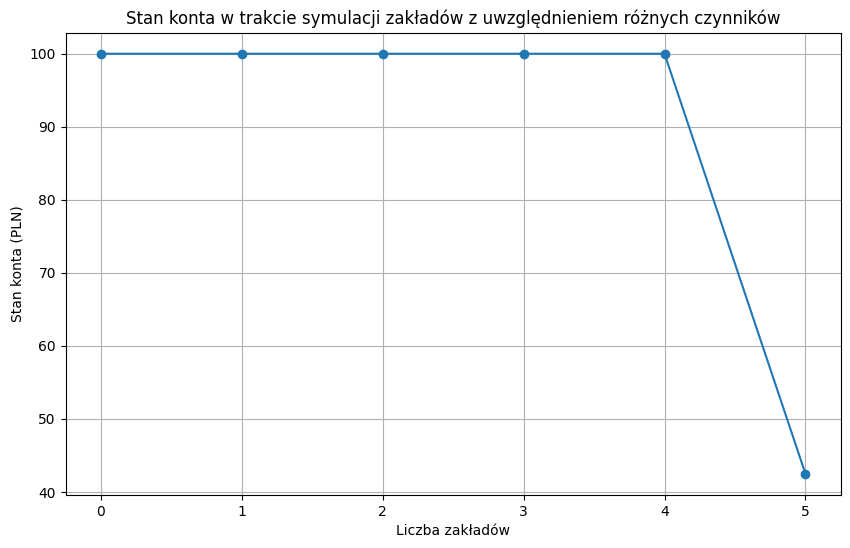

In [155]:
import numpy as np
import matplotlib.pyplot as plt

# Definicje zmiennych
marża = 0.05  # Marża bukmacherska 5%
zmienność_kursu = 0.1  # Zmienność kursów ±10%
stop_loss_threshold = 50.0  # Stop-loss, przestajemy zakładać się, gdy budżet spadnie poniżej 50 zł
stop_gain_threshold = 200.0  # Stop-gain, kończymy symulację, gdy budżet osiągnie 200 zł

# Początkowy budżet
budżet = 100.0

# Lista do przechowywania stanu konta w czasie symulacji
stany_konta = [budżet]

# Iteracja przez zdarzenia w zestawie testowym
for i in range(len(X_test)):
    # Predykcje modelu dla i-tego zdarzenia
    predicted_label = np.argmax(model.predict_proba([X_test.iloc[i]])[0])
    true_label = y_test.iloc[i]
    
    # Kursy dla danego zdarzenia
    kursy_home = X_test.iloc[i]['odds_ft_home_team_win']
    kursy_away = X_test.iloc[i]['odds_ft_away_team_win']
    kursy_draw = X_test.iloc[i]['odds_ft_draw']
    
    # Odpowiedni kurs dla przewidywanego wyniku, uwzględnienie marży i zmienności kursu
    if predicted_label == 0:
        kurs = kursy_home * (1 - marża)
    elif predicted_label == 1:
        kurs = kursy_away * (1 - marża)
    else:
        kurs = kursy_draw * (1 - marża)
    
    # Dodanie zmienności kursu
    kurs *= np.random.uniform(1 - zmienność_kursu, 1 + zmienność_kursu)
    
    # Obliczenie wartości oczekiwanej (EV)
    prawdopodobieństwo_wygranej = model.predict_proba([X_test.iloc[i]])[0][predicted_label]
    ev = (prawdopodobieństwo_wygranej * kurs) - (1 - prawdopodobieństwo_wygranej)
    
    # Zastosowanie kryterium Kelly'ego
    b = kurs - 1
    q = 1 - prawdopodobieństwo_wygranej
    f_star = (b * prawdopodobieństwo_wygranej - q) / b
    stawka = budżet * f_star if f_star > 0 else 0
    
    if ev > 0 and stawka > 0:
        # Obstawiamy tylko wtedy, gdy EV jest dodatnie i stawka > 0
        if predicted_label == true_label:
            # Wygrana zakład
            wygrana = stawka * kurs
            budżet += wygrana - stawka  # Dodajemy wygraną, ale odejmujemy stawkę, bo już była odjęta wcześniej
        else:
            # Przegrana zakład
            budżet -= stawka
    
    # Zapisanie stanu konta
    stany_konta.append(budżet)
    
    # Sprawdzenie warunków stop-loss i stop-gain
    if budżet <= stop_loss_threshold:
        print("Stop-loss osiągnięty. Symulacja zakończona.")
        break
    elif budżet >= stop_gain_threshold:
        print("Stop-gain osiągnięty. Symulacja zakończona.")
        break

# Krok 4: Rysowanie wykresu stanu konta
plt.figure(figsize=(10, 6))
plt.plot(stany_konta, marker='o')
plt.title('Stan konta w trakcie symulacji zakładów z uwzględnieniem różnych czynników')
plt.xlabel('Liczba zakładów')
plt.ylabel('Stan konta (PLN)')
plt.grid(True)
plt.show()
